In [73]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [75]:
ori_train_ds = pd.read_csv('../../data/train_ds.csv', index_col=0)
ori_test_ds = pd.read_csv('../../data/test_ds.csv', index_col=0)

In [76]:
shuffled_train_ds = shuffle(ori_train_ds)
shuffled_test_ds = shuffle(ori_test_ds)

In [91]:
targ = shuffled_train_ds['High']
feat = shuffled_train_ds.drop(['High', 'Low'], axis=1)
train_ds = tf.data.Dataset.from_tensor_slices((feat.values, targ.values))
train_ds = train_ds.batch(20)

In [92]:
targ = shuffled_test_ds['High']
feat = shuffled_test_ds.drop(['High', 'Low'], axis=1)
test_ds = tf.data.Dataset.from_tensor_slices((feat.values, targ.values))
test_ds = test_ds.batch(1)

In [102]:
input_size = train_ds.element_spec[0].shape[1]
print(input_size)

20


In [103]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(input_size,), name='input'),
    keras.layers.Dense(input_size * 2, activation='relu', name='h1'),
    keras.layers.Dense(input_size * 2, activation='relu', name='h2'),
    keras.layers.Dense(1, name='output')
], name='Sequential')
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse'
)

Epoch 1/1000
75/75 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 2/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 3/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 4/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 8/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 9/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 10/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 11/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 12/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 13/1000
75/75 [====

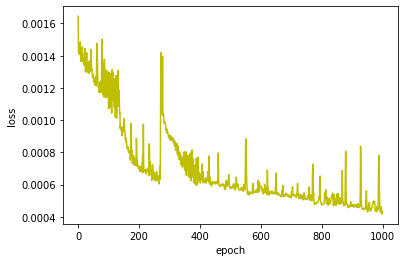

In [105]:
hist = model.fit(train_ds, epochs=1000)
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [106]:
result = model.evaluate(test_ds, return_dict=True)
print(result)

1483/1483 [==============================] - 2s 1ms/step - loss: 4.0337e-04
{'loss': 0.00040336797246709466}


In [127]:
max_ds = pd.read_csv("../../data/feat_max.csv", index_col=0)
min_ds = pd.read_csv("../../data/feat_min.csv", index_col=0)
mean_ds = pd.read_csv("../../data/feat_mean.csv", index_col=0)
std_ds = pd.read_csv("../../data/feat_std.csv", index_col=0)

def revert(value, max_ds, min_ds, mean_ds, std_ds, col):
    value = value * (max_ds.loc[col].values[0] - min_ds.loc[col].values[0]) + min_ds.loc[col].values[0]
    value = value * std_ds.loc[col].values[0] + mean_ds.loc[col].values[0]
    return value

In [146]:
std_ds.loc['High']

0    251.541415
Name: High, dtype: float64

In [147]:
for feat, targ in test_ds.take(5):
    print(revert(targ.numpy()[0], max_ds, min_ds, mean_ds, std_ds, 'High'))

38417.92962593813
42047.67225017332
20918.19335649672
20007.613432745453
19894.419795814985


In [148]:
y_oris = []
y_hats = []
errs = []
for feat, targ in test_ds:
    pred = model.predict(feat, verbose=False)
    y_ori = targ.numpy()[0]
    y_hat = pred[0][0]
    # y_ori = revert(targ.numpy()[0], max_ds, min_ds, mean_ds, std_ds, 'High')
    # y_hat = revert(pred[0][0], max_ds, min_ds, mean_ds, std_ds, 'High')
    err = (y_ori - y_hat) / y_ori * 100
    print(f'Target={y_ori:>6.2f}\tPredict={y_hat:>6.2f}\tError={err:>4.2f}%')
    y_oris.append(y_ori)
    y_hats.append(y_hat)
    errs.append(err/100)
result = model.evaluate(test_ds, return_dict=True)
print(result)

Target=  0.03	Predict=  0.05	Error=-47.60%
Target=  0.04	Predict=  0.02	Error=36.42%
Target=  0.02	Predict=  0.01	Error=27.76%
Target=  0.02	Predict=  0.02	Error=-13.56%
Target=  0.02	Predict=  0.01	Error=10.48%
Target=  0.01	Predict=  0.03	Error=-112.53%
Target=  0.01	Predict=  0.03	Error=-107.52%
Target=  0.03	Predict=  0.03	Error=14.12%
Target=  0.06	Predict=  0.06	Error=-14.11%
Target=  0.05	Predict=  0.03	Error=49.65%
Target=  0.01	Predict=  0.02	Error=-71.81%
Target=  0.26	Predict=  0.22	Error=15.90%
Target=  0.02	Predict=  0.02	Error=-43.50%
Target=  0.02	Predict=  0.02	Error=-35.65%
Target=  0.00	Predict=  0.01	Error=-340.16%
Target=  0.01	Predict=  0.02	Error=-52.20%
Target=  0.01	Predict=  0.01	Error=-105.72%
Target=  0.02	Predict=  0.03	Error=-25.02%
Target=  0.00	Predict=  0.05	Error=-7231.13%
Target=  0.05	Predict=  0.05	Error=4.90%
Target=  0.02	Predict=  0.03	Error=-33.64%
Target=  0.02	Predict=  0.01	Error=29.89%
Target=  0.03	Predict=  0.05	Error=-64.22%
Target=  0.03	

c:\Users\HoYeon\Github\tickai\.venv\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Target=  0.02	Predict=  0.05	Error=-87.87%
Target=  0.02	Predict=  0.02	Error=4.15%
Target=  0.00	Predict=  0.01	Error=-239.29%
Target=  0.12	Predict=  0.09	Error=25.61%
Target=  0.01	Predict=  0.01	Error=-125.98%
Target=  0.02	Predict=  0.03	Error=-3.65%
Target=  0.09	Predict=  0.08	Error=13.97%
Target=  0.02	Predict=  0.03	Error=-37.62%
Target=  0.09	Predict=  0.06	Error=28.59%
Target=  0.02	Predict=  0.02	Error=-7.01%
Target=  0.03	Predict=  0.03	Error=-2.54%
Target=  0.01	Predict=  0.01	Error=-2.17%
Target=  0.06	Predict=  0.09	Error=-51.72%
Target=  0.01	Predict=  0.02	Error=-16.51%
Target=  0.02	Predict=  0.02	Error=9.86%
Target=  0.01	Predict=  0.00	Error=41.42%
Target=  0.02	Predict=  0.04	Error=-104.46%
Target=  0.01	Predict=  0.02	Error=-35.08%
Target=  0.01	Predict=  0.02	Error=-81.29%
Target=  0.00	Predict=  0.01	Error=-141.91%
Target=  0.04	Predict=  0.04	Error=10.37%
Target=  0.02	Predict=  0.02	Error=21.17%
Target=  0.04	Predict=  0.05	Error=-27.83%
Target=  0.02	Predict

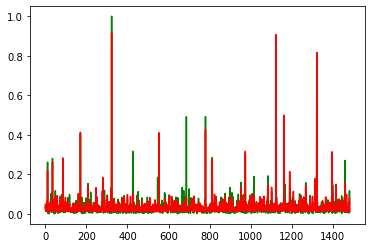

In [149]:
plt.plot(y_oris, 'g')
plt.plot(y_hats, 'r')
plt.show()

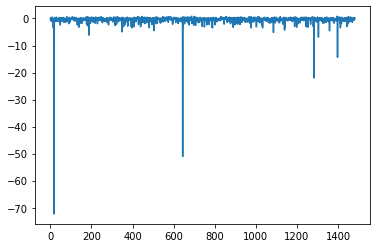

In [150]:
plt.plot(errs)
plt.show()

In [151]:
import pandas as pd

data = {'Target': y_oris, 'Predict': y_hats, 'Errors': errs}
df = pd.DataFrame(data)
df.head()

,Target,Predict,Errors
0,0.032974,0.048670,-0.475988
1,0.036162,0.022993,0.364161
2,0.017607,0.012719,0.277635
3,0.016807,0.019086,-0.135558
4,0.016708,0.014956,0.104840


In [152]:
sorted_df = df.sort_values(by=['Errors'], axis=0)
sorted_df.head()

,Target,Predict,Errors
44,0.000000,0.049803,-inf
18,0.000643,0.047124,-72.311297
644,0.000413,0.021511,-51.076996
1283,0.001051,0.024168,-21.986047
1398,0.002675,0.041031,-14.338820
